In [91]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

[1] 데이터 준비

In [92]:
# # 기본 : ndarray 형태로 반환
# # 반환값 : Bunch 객체로 dict와 유사
# diabetes = load_diabetes()
# diabetes['data']

In [93]:
# 기본 : DataFrame 형태로 반환
# 반환값 : Bunch 객체로 dict와 유사
diabetes = load_diabetes(as_frame = True, scaled = False)
diabetes['data']

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [94]:
# # 기본 : ndarray 형태로 반환
# # 반환값 : tuple로 data와 target만 반환
# data, target = load_diabetes(return_X_y=True)
# type(data)

In [95]:
# # 기본 : DataFrame 형태로 반환
# # 반환값 : tuple로 data와 target만 반환
# data, target = load_diabetes(return_X_y=True, as_frame=True)
# type(data)

In [96]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [97]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

[2] 피쳐/타겟 분리

> s1 : 총 혈청 콜레스테롤  
> s2 : 저밀도 지단백  
> s3 : 고밀도 지단백  
> s4 : 총 콜레스테롤  
> s5 : 혈청 트리글리세리드 수치의 log값  
> s6 : 혈당 수치  

In [98]:
features = diabetes['data']
features

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [99]:
# 1년동안 당뇨병 진행을 정량적으로 나타낸 것
target = diabetes['target']
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

[3] EDA(탐색적 자료 분석)

In [104]:
diabetes['data']['target'] = target
df = diabetes['data']
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


In [105]:
df.corr(numeric_only=True)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


> target과 상관계수가 0.35보다 큰 변수를 선택하기로 결정 (bmi, bp, s3, s4, s5, s6)

In [111]:
corr_matrix = df[['bmi', 'bp', 's3', 's4', 's5', 's6']].corr()
corr_matrix

,bmi,bp,s3,s4,s5,s6
bmi,1.000000,0.395411,-0.366811,0.413807,0.446157,0.388680
bp,0.395411,1.000000,-0.178762,0.257650,0.393480,0.390430
s3,-0.366811,-0.178762,1.000000,-0.738493,-0.398577,-0.273697
s4,0.413807,0.257650,-0.738493,1.000000,0.617859,0.417212
s5,0.446157,0.393480,-0.398577,0.617859,1.000000,0.464669
s6,0.388680,0.390430,-0.273697,0.417212,0.464669,1.000000


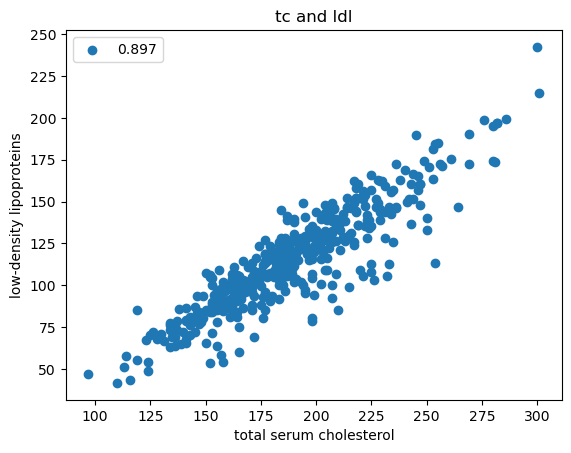

In [102]:
plt.scatter(features['s1'], features['s2'], label = round(corr_matrix['s1']['s2'], 3))
plt.title('tc and ldl')
plt.xlabel('total serum cholesterol')
plt.ylabel('low-density lipoproteins')
plt.legend()
plt.show()

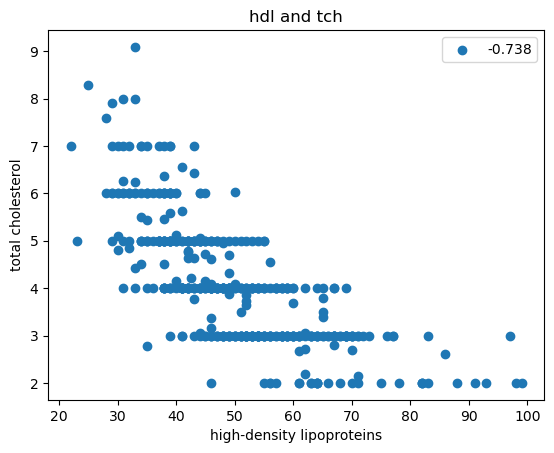

In [103]:
plt.scatter(features['s3'], features['s4'], label = round(corr_matrix['s3']['s4'], 3))
plt.title('hdl and tch')
plt.xlabel('high-density lipoproteins')
plt.ylabel('total cholesterol')
plt.legend()
plt.show()

> s1과 s2의 상관계수가 높고 s3와 s4의 상관계수가 높아 각각 하나씩 제거해야한다고 판단.  
> s1의 경우 s4가 콜레스테롤을 설명하고 있으므로 s1 제거  
> s3의 경우 s2가 지단백을 설명하고 있으므로 s3 제거  